In [2]:
import random
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import torchvision.transforms as transforms
import torch.nn as nn

In [3]:
def get_labels(file_uri):
    with open(file_uri, "r") as annotation_file:
        annotations = annotation_file.readlines()
        
    split_annotations = [annotation.split(" ") for annotation in annotations]
    return [(split_annotation[0], split_annotation[1]) for split_annotation in split_annotations]

In [4]:
def get_images(folder_uri, labels):
    images = []
    for idx in range(1, len(labels)):
        image_name = f"image_{idx}.jpeg"
        image = Image.open(folder_uri+"/"+image_name)
        images.append(image)
    return images

def process_data(transforms, images, labels):
    return [transforms(image) for image in images], labels
        
def dump_data(folder_uri, images, labels):
    for i, image in enumerate(images):
        image.save(folder_uri+f"/image_{i+1}.jpeg", "JPEG")
        
        with open(folder_uri+"/_annotations.txt", "a") as annotation_file:
            appendix = " \n" if i != len(labels) else ""
            annotation_file.write(f"{labels[i][0]} {labels[i][1]}"+appendix)

In [5]:
ANNOTATIONS_FILE_URI = "../data/semi-processed/_annotations.txt"
IMAGES_FOLDER_URI = "../data/semi-processed"
labels = get_labels(ANNOTATIONS_FILE_URI)
print(len(labels))
images = get_images(IMAGES_FOLDER_URI, labels)


296


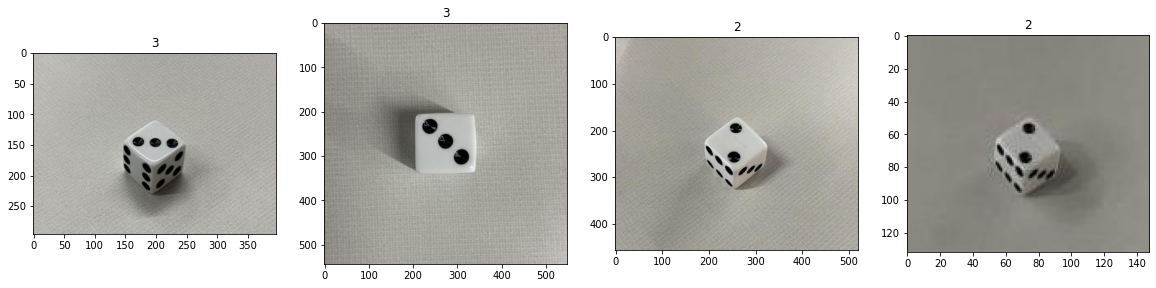

In [6]:
def plot_dice(images, labels, n_plots = 4):
    random_ints = [random.randint(0, len(images)-1) for _ in range(n_plots)]

    fig, axs = plt.subplots(1, n_plots, figsize=(20,10))
    for i, random_int in enumerate(random_ints):
        axs[i].imshow(images[random_int], cmap="gray")
        axs[i].set_title(labels[random_int][1])
    plt.show()
    
def plot_die(image):
    fig, axs = plt.subplots(figsize=(5,5))
    axs.imshow(image, cmap="gray")
    plt.show()

plot_dice(images, labels)

mean:  159.77141560013837 std:  29.475421875893502


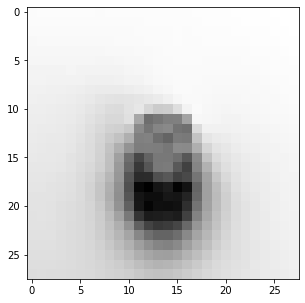

In [7]:
transforms_ = nn.Sequential(
    transforms.Grayscale(num_output_channels=1),
    transforms.Resize((28, 28))
)

images_resized, labels = process_data(transforms_, images, labels)

def get_images_mean_std(images):
    image_arrays = [np.array(image) for image in images]
    image_stack = np.stack(image_arrays)
    return image_stack.mean(axis=0), image_stack.mean(), image_stack.std()
    
mean_image, images_mean, images_std = get_images_mean_std(images_resized)
print("mean: ",images_mean, "std: ", images_std)

plot_die(mean_image)

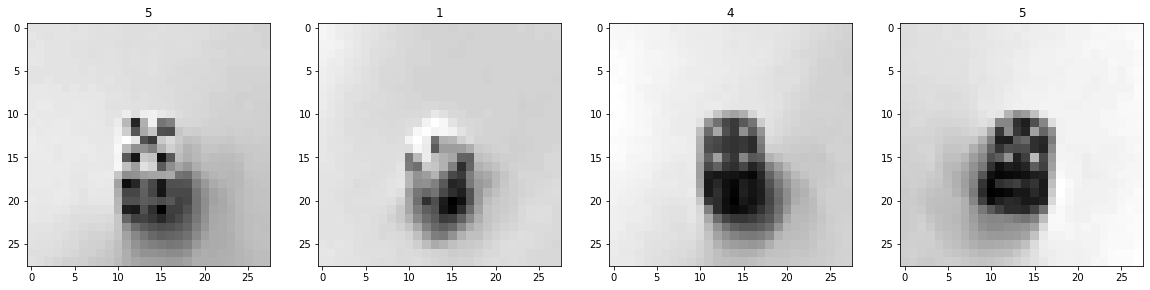

In [11]:
plot_dice(images_resized, labels)

In [9]:
def normalize(images, mean, std):
    image_arrays = [(np.array(image)-mean)/std for image in images]
    images = [Image.fromarray(image_array) for image_array in image_arrays]
    return images
          
#images_normalized = normalize(images_resized, images_mean, images_std)

#plot_dice(images_normalized, labels)

In [10]:
dump_data("../data/processed/raw", images_resized, labels)